In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [2]:
df=pd.read_csv('boston_marathon_14results.csv')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.shape

(31984, 21)

In [5]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [6]:
X=pd.DataFrame(df)

In [7]:
X['10k']=pd.to_numeric(X['10k'], errors='coerce')
X['25k']=pd.to_numeric(X['25k'], errors='coerce')
X['35k']=pd.to_numeric(X['35k'], errors='coerce')
X['40k']=pd.to_numeric(X['40k'], errors='coerce')

In [8]:
X=X.drop(['name','ctz','bib','state','country','city','genderdiv'],axis=1)
X['gender']=np.where(X['gender']=='M',0,1)

In [9]:
X=X.replace(to_replace='-', value=0)
X=X.replace(to_replace='NaN', value=0)

In [10]:
X.isna().sum()

10k          50
division      0
25k         216
gender        0
age           0
official      0
35k          34
overall       0
pace          0
30k           0
5k            0
half          0
20k           0
40k          39
dtype: int64

In [11]:
X=X.dropna(axis=0)

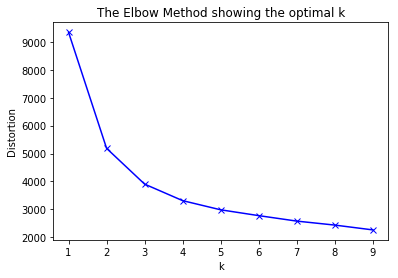

In [12]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [36]:
X_norm = normalize(X)
km = KMeans(n_clusters=4)
km_pred = km.fit_predict(X_norm)

In [38]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

print(metrics.silhouette_score(X_norm, km.labels_, metric='euclidean'))

0.5934302817151329


The score tells me that each cluster is made of more similar data points than the ones in the other clusters.

In [39]:
X['cluster']=km_pred
X.head()

,10k,division,25k,gender,age,official,35k,overall,pace,30k,5k,half,20k,40k,ms_labels,cluster
0,17.37,8,47.67,0,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43,2,1
1,32.58,1,82.43,1,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,2,1
2,16.62,1,45.80,0,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10,2,1
3,32.57,3,82.43,1,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,2,1
4,17.12,2,46.37,0,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72,2,1


In [40]:
X.groupby(by='cluster').mean()

,10k,division,25k,gender,age,official,35k,overall,pace,40k,ms_labels
cluster,,,,,,,,,,,
0,52.890638,3500.531447,137.302240,0.546052,33.711182,249.297299,202.070815,17129.929165,9.516585,235.341778,0.025742
1,33.676022,102.591111,85.424156,0.095556,32.455556,148.190733,121.913889,182.195556,5.660133,140.005000,2.497778
2,40.937624,1695.261879,103.055473,0.000000,31.789925,181.875338,147.880411,2902.591640,6.945163,171.474419,1.000000
3,53.019837,1020.444337,137.395811,0.467230,49.757193,249.426714,201.901024,17503.359329,9.521533,235.100591,0.005481


In [41]:
X.groupby(by='cluster').count()

,10k,division,25k,gender,age,official,35k,overall,pace,30k,5k,half,20k,40k,ms_labels
cluster,,,,,,,,,,,,,,,
0,10955,10955,10955,10955,10955,10955,10955,10955,10955,10955,10955,10955,10955,10955,10955
1,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450
2,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799
3,17516,17516,17516,17516,17516,17516,17516,17516,17516,17516,17516,17516,17516,17516,17516


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X_norm, test_size=0.7, random_state=42)

In [15]:
X_train.shape

(9516, 14)

In [16]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X_norm, quantile=0.2, n_samples=1000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
print("The silhouette_score of *Mean Shift*:")
print(metrics.silhouette_score(X_train, ms.labels_, metric='euclidean'))

Number of estimated clusters: 10
The silhouette_score of *Mean Shift*:
0.5894009593201897


Mean Shift predicted that there will be 10 clusters. The score is similar to K-means.

In [17]:
from sklearn.cluster import SpectralClustering

# I will be using 4 clusters. 
sc = SpectralClustering(n_clusters=4)
sc.fit(X_train)
print("Done")

Done


In [18]:
print("The silhouette_score of *Spectral Clustering*:")
print(metrics.silhouette_score(X_train, sc.labels_, metric='euclidean'))

The silhouette_score of *Spectral Clustering*:
0.7533323553054311


Spectral Clustering gave relly high score. However, it takes really long to process larger dataset.

In [131]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(X_train)
print('Done')

Done


In [134]:
# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
print("The silhouette_score of *Affinity Clustering*:")
print(metrics.silhouette_score(X_train, af.labels_, metric='euclidean'))

Estimated number of clusters: 5588
The silhouette_score of *Affinity Clustering*:
0.15667825346846373


Considering the training dataset has 9,517 rows, 5,588 clusters are too many.

In [135]:
# Increase the damping from 0.5 (default) to 0.8

af = AffinityPropagation(damping=0.8).fit(X_train)
print('Done')

Done


In [136]:
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
print("The silhouette_score of *Affinity Clustering*:")
print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

Estimated number of clusters: 87
The silhouette_score of *Affinity Clustering*:
0.516214670748862


To me, it looks like it's worth to compare Mean Shift and K-means. Mean Shift gives me the most satisfying results in both silhouette_score and the time it takes to process compared to Affinity and Spectral methods. I now want to run Mean Shift on the entire dataset and see that result it gives me. 

In [26]:
bandwidth = estimate_bandwidth(X_norm, quantile=0.5, n_samples=1000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_norm)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
print("The silhouette_score of *Mean Shift*:")
print(metrics.silhouette_score(X_norm, ms.labels_, metric='euclidean'))

Number of estimated clusters: 4
The silhouette_score of *Mean Shift*:
0.760127494270635


In [27]:
X['ms_labels']=ms.labels_

In [28]:
X.groupby(by='ms_labels').mean()

,10k,division,25k,gender,age,official,35k,overall,pace,40k
ms_labels,,,,,,,,,,
0,53.072433,1964.281102,137.650206,0.502966,43.688674,249.896100,202.403531,17468.009305,9.539434,235.688911
1,41.228798,1824.977126,103.894903,0.000000,31.883698,184.013573,149.397352,3387.621456,7.026691,173.442941
2,29.797667,35.955556,76.675611,0.150000,31.266667,133.770667,110.315444,53.161111,5.110222,126.313333
3,36.389857,122.455197,91.598459,0.071685,34.770609,158.364875,130.108495,294.172043,6.048100,149.657097


In [31]:
X.groupby(by='cluster').mean()

,10k,division,25k,gender,age,official,35k,overall,pace,40k,ms_labels
cluster,,,,,,,,,,,
0,53.022072,1020.224297,137.403477,0.467386,49.758967,249.441281,201.913102,17506.022790,9.522089,235.114356,0.005483
1,40.937624,1695.261879,103.055473,0.000000,31.789925,181.875338,147.880411,2902.591640,6.945163,171.474419,1.000000
2,33.676022,102.591111,85.424156,0.095556,32.455556,148.190733,121.913889,182.195556,5.660133,140.005000,2.497778
3,52.887164,3499.073064,137.290067,0.545745,33.720058,249.274129,202.051403,17125.948098,9.515701,235.319620,0.025723


In [32]:
X.groupby(by='ms_labels').count()

,10k,division,25k,gender,age,official,35k,overall,pace,30k,5k,half,20k,40k,cluster
ms_labels,,,,,,,,,,,,,,,
0,28157,28157,28157,28157,28157,28157,28157,28157,28157,28157,28157,28157,28157,28157,28157
1,3104,3104,3104,3104,3104,3104,3104,3104,3104,3104,3104,3104,3104,3104,3104
2,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
3,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279


In [33]:
X.groupby(by='cluster').count()

,10k,division,25k,gender,age,official,35k,overall,pace,30k,5k,half,20k,40k,ms_labels
cluster,,,,,,,,,,,,,,,
0,17508,17508,17508,17508,17508,17508,17508,17508,17508,17508,17508,17508,17508,17508,17508
1,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799
2,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450
3,10963,10963,10963,10963,10963,10963,10963,10963,10963,10963,10963,10963,10963,10963,10963


Text(0.5, 1.0, 'Mean Shift Clusters')

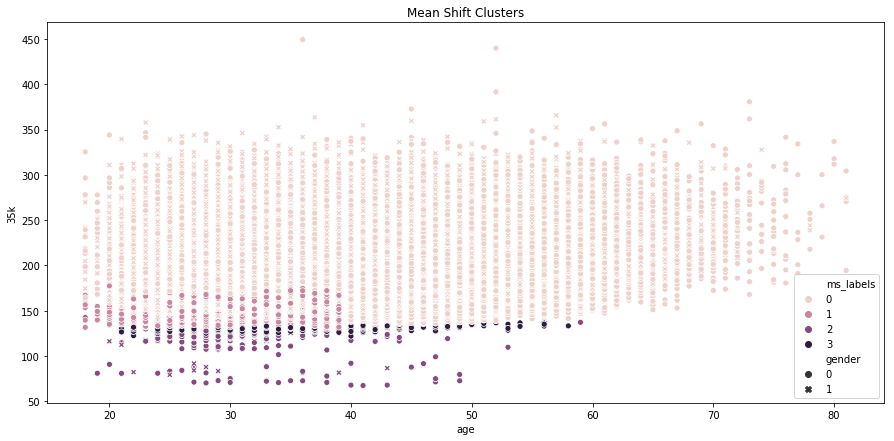

In [34]:
# Scatterplot the fastest group in both clustering
plt.figure(figsize=(15,7))
sns.scatterplot(x='age', y='35k', hue='ms_labels',style="gender", data=X)
plt.title('Mean Shift Clusters')

Text(0.5, 1.0, 'K-Means Clusters')

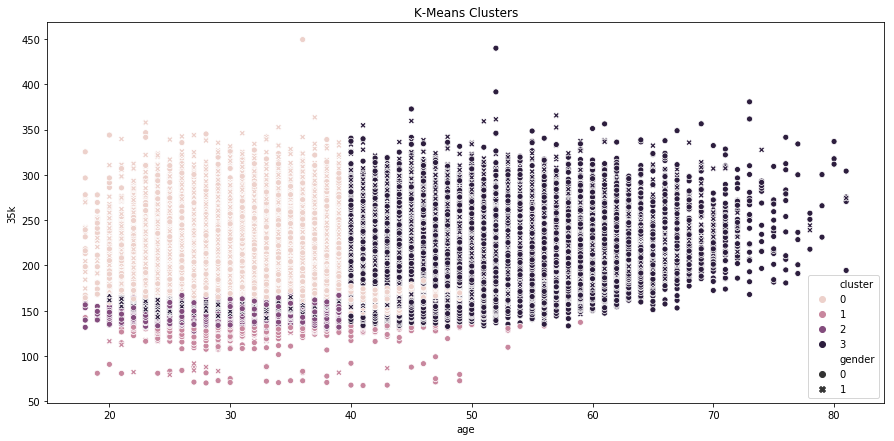

In [42]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='age', y='35k', hue='cluster',style="gender", data=X)
plt.title('K-Means Clusters')

In [43]:
X['final_cluster']=np.nan

In [44]:
X.loc[X['ms_labels']==2,'final_cluster']="fastest"
X.loc[X['ms_labels']==3,'final_cluster']="2nd_fastest"

In [55]:
X.loc[(X['final_cluster'].isnull()) & (X.gender==1),'final_cluster']='rest_female'
X.loc[(X['final_cluster'].isnull()) & (X.gender==0),'final_cluster']='rest_male'

In [60]:
X.groupby(by='final_cluster').mean()

,10k,division,25k,gender,age,official,35k,overall,pace,40k,ms_labels,cluster
final_cluster,,,,,,,,,,,,
2nd_fastest,36.389857,122.455197,91.598459,0.071685,34.770609,158.364875,130.108495,294.172043,6.048100,149.657097,3.000000,1.229391
fastest,29.797667,35.955556,76.675611,0.150000,31.266667,133.770667,110.315444,53.161111,5.110222,126.313333,2.000000,1.000000
rest_female,54.391922,2164.735489,141.315595,1.000000,39.798122,253.936425,206.824131,18409.362943,9.693596,239.886960,0.000000,1.732806
rest_male,49.829597,1772.969647,128.486764,0.000000,44.767998,234.590032,189.119963,14132.318674,8.955610,220.912359,0.181531,1.961109


In [63]:
X.groupby(by='gender').count()

,10k,division,25k,age,official,35k,overall,pace,30k,5k,half,20k,40k,ms_labels,cluster,final_cluster
gender,,,,,,,,,,,,,,,,
0,17511,17511,17511,17511,17511,17511,17511,17511,17511,17511,17511,17511,17511,17511,17511,17511
1,14209,14209,14209,14209,14209,14209,14209,14209,14209,14209,14209,14209,14209,14209,14209,14209


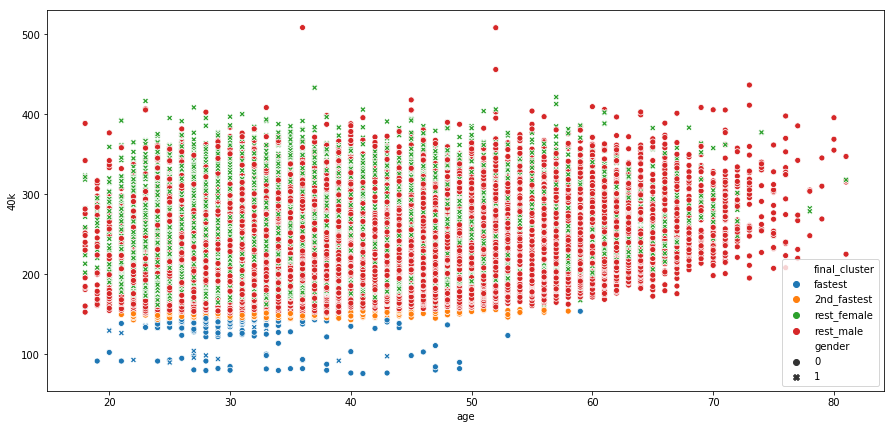

In [62]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='age', y='40k', hue='final_cluster',style="gender", data=X)